# PROBLEM STATEMENT

This case requires to develop a model for predicting fraudulent transactions for a 
financial company and use insights from the model to develop an actionable plan. Data for the 
case is available in CSV format having  500000 rows and 10 columns. 

step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
import pandas as pd      # These are the necessary libraries that need to be import
import numpy as np
import warnings
import seaborn as sb
import matplotlib.pyplot as mp
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
np.set_printoptions(suppress=True)

In [2]:
f=pd.read_csv(r'C:\Users\Lenovo\Downloads\Fraud_new.csv',header=0) # IT IS USED TO ACCESS THE FILE
f.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,NaN,CASH_OUT,157548.74,C1622644134,41.00,0.00,C1410204448,0.00,157548.74,0,0
1,161.00,PAYMENT,612.36,C713507882,0.00,0.00,M750820911,0.00,0.00,0,0
2,374.00,CASH_IN,32010.44,C1162363812,3950563.78,3982574.22,C922502124,7560073.53,7528063.10,0,0
3,377.00,PAYMENT,15188.34,C742469163,922.00,0.00,M1218715527,0.00,0.00,0,0
4,NaN,PAYMENT,9771.36,C11682420,10223.34,451.98,M2028882426,0.00,0.00,0,0


In [3]:
f.shape   # it tells about how many rows and columns are present

(500000, 11)

In [4]:
f.describe()  # describe method tells about the statistics value of the data

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,255994.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00,500000.00
mean,243.12,180392.29,828942.94,849992.78,1101407.73,1226411.52,0.00,0.00
std,142.41,593150.46,2877951.87,2913498.74,3365900.44,3636086.91,0.04,0.00
min,1.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00
25%,155.00,13422.78,0.00,0.00,0.00,0.00,0.00,0.00
50%,238.00,74771.36,13945.83,0.00,131228.20,213586.08,0.00,0.00
75%,334.00,208812.91,106705.75,143232.25,944124.85,1116951.81,0.00,0.00
max,742.00,53957543.97,35375803.13,35755711.64,301140972.46,321589797.51,1.00,1.00


In [5]:
f.isnull().sum()  # it will tells us about the missing values in the data

step              244006
type                   0
amount                 0
nameOrig               0
oldbalanceOrg          0
newbalanceOrig         0
nameDest               0
oldbalanceDest         0
newbalanceDest         0
isFraud                0
isFlaggedFraud         0
dtype: int64

In [6]:
f.duplicated().sum() # it will tells us about the DUPLICATES values in the data

0

In [7]:
for i in f.columns:    # HERE WE ARE CHECKING THE UNIQUE VALUES PRESENT IN THE DATA
    print({i:f[i].unique()})

{'step': array([ nan, 161., 374., 377.,  14., 381., 285.,  44., 397., 263.,  11.,
       284., 255.,  33., 238.,  40., 347., 355., 356., 396.,  15., 379.,
       140., 226., 178., 279., 332., 324., 288., 135.,  18., 233., 203.,
       300., 371., 405., 184., 259., 322., 164., 305., 403., 154., 311.,
        13., 302., 261.,  16., 251., 181.,  43., 359., 211., 205.,  39.,
       393., 229., 360., 235., 400., 306., 256.,  22., 274., 303., 131.,
       325., 336., 518.,  41., 596., 369., 278.,  35., 469., 351., 286.,
       134., 139., 153., 375., 280.,  17., 227., 230., 158., 309.,  34.,
       258., 376., 204., 687., 358., 162.,  36., 401.,  42., 189., 179.,
       182., 327., 155., 273., 350., 250., 684., 185., 301., 546., 234.,
       380., 326., 349., 215., 399., 331., 228., 328., 160., 299., 323.,
       694., 597., 283., 188.,  10., 372.,  38., 133., 588., 232., 167.,
       257., 394., 402., 406.,   9., 310., 180., 210., 260.,  20.,  21.,
       209., 132., 237., 282., 163., 165.,

In [8]:
f.dtypes  # to check the datatypes of the data

step              float64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
f.drop(['step','nameOrig','nameDest'],axis=1,inplace=True) # so we are droping this column as a feature selection technique

In [10]:
col = f[['amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']]


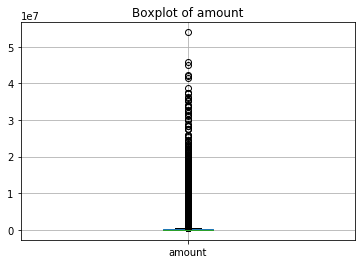

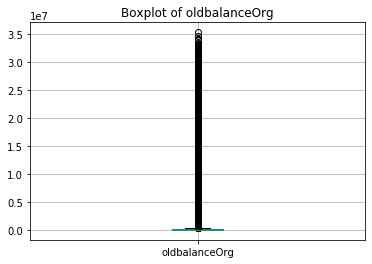

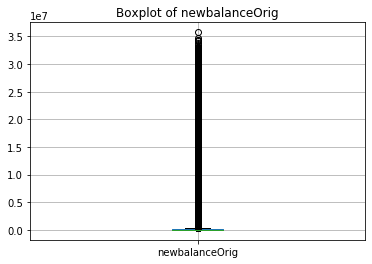

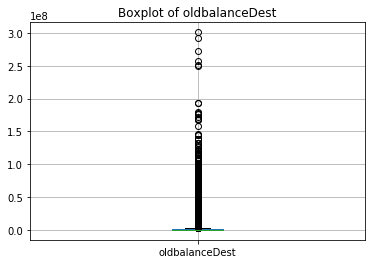

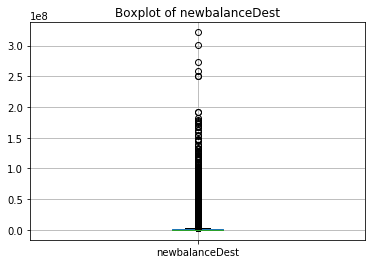

In [11]:
for i in col:
    f.boxplot(column=i)
    mp.title('Boxplot of ' + i)
    mp.show()

We can see few outliers present in few variables like oldbalanceDest,newbalanceDest but there are also some variables in which there is no outliers like amount,oldbalanceOrg.

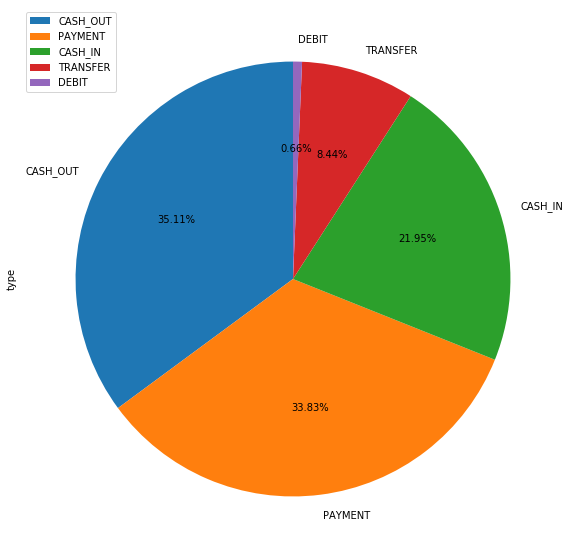

In [12]:
mp.figure(figsize=(15,10))

f['type'].value_counts().plot.pie(startangle=90,autopct='%1.2f%%')
mp.legend(loc='upper left')

So most of the data value belongs to these three type of transaction Cashout,Payment,Cashin.

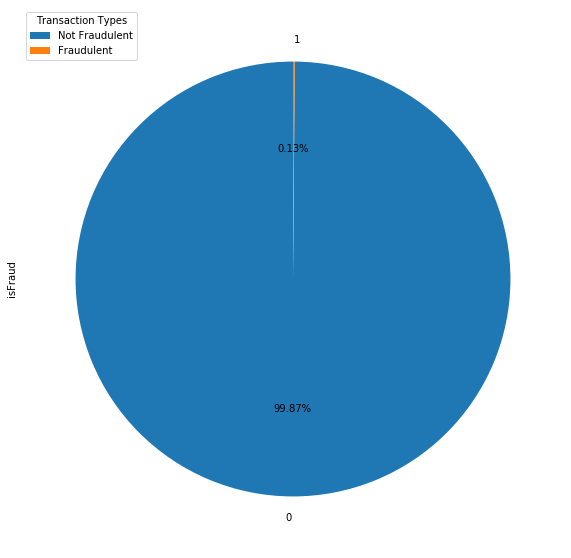

In [13]:
mp.figure(figsize=(15,10))

f['isFraud'].value_counts().plot.pie(startangle=90,autopct='%1.2f%%')
labels = ['Not Fraudulent', 'Fraudulent']
mp.legend(labels, loc='upper left', title='Transaction Types')


So from these we can see it this is an imbalanced data so before building the model we need to balanced the data.

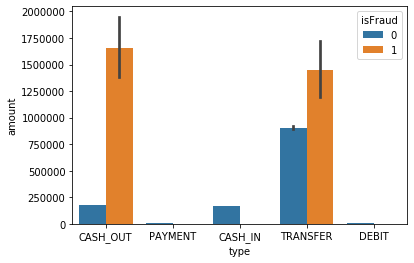

In [14]:
sb.barplot(data=f,x='type',y='amount',hue='isFraud')

So we can see that Cashout,transfer are the two type of transaction in which fradulent transaction is happening.

In [15]:
pd.crosstab(f['type'],f['isFraud']) # To see the count of fradulent transaction in each type

isFraud,0,1
type,,
CASH_IN,109762,0
CASH_OUT,175241,326
DEBIT,3325,0
PAYMENT,169161,0
TRANSFER,41853,332


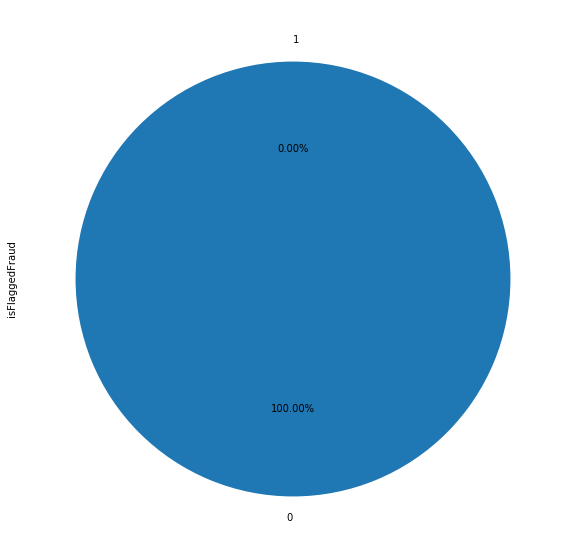

In [16]:
mp.figure(figsize=(15,10))

f['isFlaggedFraud'].value_counts().plot.pie(startangle=90,autopct='%1.2f%%')

So we can see that almost 100% of data value belongs to class 0 so we have to drop this variable bcoz of low variance problem

In [17]:
f['isFlaggedFraud'].value_counts()

0    499996
1         4
Name: isFlaggedFraud, dtype: int64

In [18]:
pd.crosstab(f['type'],f['isFraud'])


isFraud,0,1
type,,
CASH_IN,109762,0
CASH_OUT,175241,326
DEBIT,3325,0
PAYMENT,169161,0
TRANSFER,41853,332


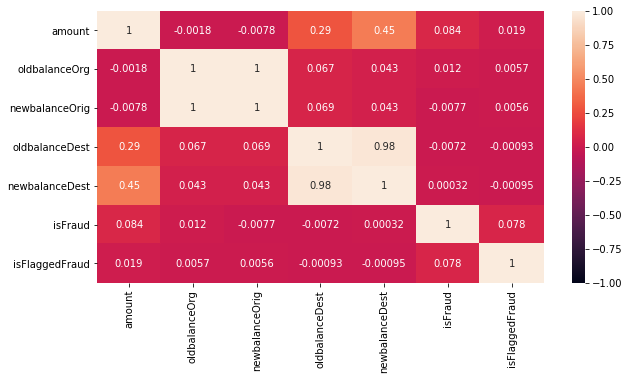

In [19]:
corr_df=f.corr()
mp.figure(figsize=(10,5))
sb.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
mp.show()

In [20]:
f.drop(['oldbalanceDest'],axis=1,inplace=True)  # we are droping these variable due to high correlation.

In [21]:
f = f[[i for i in f.columns if i != 'isFraud'] + ['isFraud']] # WE ARE REARRANGING THE COLUMNS
f.head()

,type,amount,oldbalanceOrg,newbalanceOrig,newbalanceDest,isFlaggedFraud,isFraud
0,CASH_OUT,157548.74,41.00,0.00,157548.74,0,0
1,PAYMENT,612.36,0.00,0.00,0.00,0,0
2,CASH_IN,32010.44,3950563.78,3982574.22,7528063.10,0,0
3,PAYMENT,15188.34,922.00,0.00,0.00,0,0
4,PAYMENT,9771.36,10223.34,451.98,0.00,0,0


In [22]:
f.isFraud.value_counts()  # IT IS TO CHECK THE COUNT OF UNIQUE VALUES

0    499342
1       658
Name: isFraud, dtype: int64

In [23]:
f.drop('isFlaggedFraud',axis=1,inplace=True)  # we are droping this bcoz of low variance problem

In [24]:
f['type'] = f['type'].astype(str)

In [25]:
f.dtypes    # here we  are converting categorical value into numerical

type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [26]:
f['type'].replace(['CASH_IN','CASH_OUT','DEBIT','PAYMENT','TRANSFER'],[0,1,2,3,4],inplace=True)  
# here we  are converting categorical value into numerical

In [27]:
# CREATING X AND Y ,X FOR INDEPENDENT VAR AND Y FOR DEPENDENT VAR
X=f.values[:,0:-1]
Y=f.values[:,-1]

In [28]:
X.shape

(500000, 5)

In [29]:
Y.shape

(500000,)

In [30]:
from sklearn.preprocessing import StandardScaler  # HERE WE ARE SCALING THE DATA

scaler=StandardScaler()

scaler.fit(X)

X=scaler.transform(X)

print(X)

[[-0.53067655 -0.03851227 -0.28801829 -0.29174326 -0.29395993]
 [ 0.94984055 -0.3030936  -0.28803253 -0.29174326 -0.33728917]
 [-1.2709351  -0.25015912  1.08466857  1.07519682  1.73308781]
 ...
 [-1.2709351   0.12306074  1.41849238  1.48093043 -0.02788443]
 [ 1.6900991  -0.00455116 -0.28803253 -0.29174326  0.05157542]
 [ 0.94984055 -0.2828135  -0.28803253 -0.29174326 -0.33728917]]


In [31]:
from sklearn.model_selection import train_test_split   # HERE WE SPLITING THE DATA INTO TRAINING AND TESTING 
#split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [32]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(350000, 5)
(150000, 5)
(350000,)
(150000,)


# Smote
It is a technique that is used to overcome the problem of imbalanced data.

In [33]:
from imblearn.over_sampling import SMOTE  # 
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)

In [34]:
print("Before SMOTE, counts of label '0': ", (sum(Y_train == 0)))
print("Before SMOTE, counts of label '1': ", (sum(Y_train == 1)))

Before SMOTE, counts of label '0':  349521
Before SMOTE, counts of label '1':  479


In [35]:
print("After SMOTE, counts of label '0': ", (sum(Y_train_res == 0)))
print("After SMOTE, counts of label '1': ", (sum(Y_train_res == 1)))

After SMOTE, counts of label '0':  349521
After SMOTE, counts of label '1':  349521


# LogisticRegression

In [36]:
from sklearn.linear_model import LogisticRegression
# create a model object
lm_class=LogisticRegression()
#train the model object
lm_class.fit(X_train_res,Y_train_res)

#print intercept and coefficients
print(lm_class.intercept_)
print(lm_class.coef_)

[-3.72449583]
[[  0.35716014  -2.92154504  81.79548762 -83.71894118  -1.05190009]]


In [37]:
print(list(zip(f.columns[:-1],lm_class.coef_.ravel())))

[('type', 0.35716014373608146), ('amount', -2.921545041943518), ('oldbalanceOrg', 81.79548762083671), ('newbalanceOrig', -83.71894118110835), ('newbalanceDest', -1.0519000885579832)]


In [38]:
# predict using the model
Y_pred=lm_class.predict(X_test)
print(Y_pred)

[0. 0. 0. ... 0. 0. 0.]


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[144822   4999]
 [    34    145]]
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98    149821
         1.0       0.03      0.81      0.05       179

    accuracy                           0.97    150000
   macro avg       0.51      0.89      0.52    150000
weighted avg       1.00      0.97      0.98    150000

Accuracy of the model:  0.9664466666666667


So after applying log reg base model we are getting 96.64% accuracy i have also tried tuning technique but it is not showing good result.

# KNN MODEL

In [40]:
# predicting using the Kneighbors_Classifier
from sklearn.neighbors import KNeighborsClassifier
model_knn= KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),metric='euclidean')
# euclidean,manhatten,minkowski
# fit the model on the data and predict the values
model_knn.fit(X_train_res,Y_train_res)

Y_pred=model_knn.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)

[[143590   6231]
 [    12    167]]
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98    149821
         1.0       0.03      0.93      0.05       179

    accuracy                           0.96    150000
   macro avg       0.51      0.95      0.51    150000
weighted avg       1.00      0.96      0.98    150000

Accuracy of the model:  0.95838


So after applying KNN classifier base model we are getting 95.83% accuracy with a good recall value for both the class i.e 96% for class 0 and 93% for class 1. I have also tried tuning technique but it is not showing good result.

# DT MODEL

In [42]:
from sklearn.tree import DecisionTreeClassifier
d_model=DecisionTreeClassifier(criterion='gini',random_state=10)
#min_sample_leaf,min_samples_split,max_depth,max_features [PRUNING HYPERPARAMETERS]
d_model.fit(X_train_res,Y_train_res)
Y_pred=d_model.predict(X_test)
print(list(Y_pred))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[149669    152]
 [    13    166]]
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    149821
         1.0       0.52      0.93      0.67       179

    accuracy                           1.00    150000
   macro avg       0.76      0.96      0.83    150000
weighted avg       1.00      1.00      1.00    150000

Accuracy of the model:  0.9989


In [44]:
d_model.score(X_train_res,Y_train_res) # To check whether the model is not overfitted or underfitted model.

1.0

In [45]:
s=pd.DataFrame()                #IT TELLS US ABOUT THE IMPORTANCE OF VARIABLE
s['Column']=f.columns[0:-1]
s['Imp value']=d_model.feature_importances_
s.sort_values('Imp value',ascending=False)

,Column,Imp value
3,newbalanceOrig,0.38
2,oldbalanceOrg,0.35
1,amount,0.15
4,newbalanceDest,0.06
0,type,0.06


So after applying DT classifier base model we are getting 99.89% accuracy with a good recall value for both the class i.e 100% for class 0 and 93% for class 1. I have also tried tuning technique but it is not showing good result.

# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier
model_r=RandomForestClassifier(n_estimators=100,random_state=10,bootstrap=True,n_jobs=-1)
#fit the model on the data and predict the values
model_r.fit(X_train_res,Y_train_res)
Y_pred=model_r.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[149646    175]
 [    12    167]]
Classification report: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    149821
         1.0       0.49      0.93      0.64       179

    accuracy                           1.00    150000
   macro avg       0.74      0.97      0.82    150000
weighted avg       1.00      1.00      1.00    150000

Accuracy of the model:  0.9987533333333334


In [48]:
model_r.score(X_train_res,Y_train_res)  # To check whether the model is not overfitted or underfitted model.

1.0

So after applying RF classifier base model we are getting 99.87% accuracy with a good recall value for both the class i.e 100% for class 0 and 93% for class 1. I have also tried tuning technique but it is not showing good result.

# GRADIENT BOOSTING

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
model_g=GradientBoostingClassifier(n_estimators=100,random_state=10)
model_g.fit(X_train_res,Y_train_res)
Y_pred=model_g.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print('Classification report:')
print(classification_report(Y_test,Y_pred))
acc=accuracy_score(Y_test,Y_pred)
print('Accuracy of the model:',acc)

[[147542   2279]
 [     3    176]]
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99    149821
         1.0       0.07      0.98      0.13       179

    accuracy                           0.98    150000
   macro avg       0.54      0.98      0.56    150000
weighted avg       1.00      0.98      0.99    150000

Accuracy of the model: 0.9847866666666667


In [51]:
model_g.score(X_train_res,Y_train_res)  # To check whether the model is not overfitted or underfitted model.

0.9924310699500173

So after applying GradientBoosting classifier base model we are getting 98.47% accuracy with a good recall value for both the class i.e 98% for class 0 and 98% for class 1.

# So after applying various model we can clearly see GradientBoosting classifier is showing a good performance so for any future prediction we will use this model.